# Projeto 2 - Ciência dos Dados 2020.2

**Participantes**

- Enrico Lopez Borges de Carvalho

- Luana Mitsudo Coelho

- Luiza Valezim Augusto Pinto

- Rodrigo Carvalho Monteiro de Barros

## Introdução

Em nosso trabalho do Projeto 2, decidimos tentar prever a nota de diversos jogos levando em consideração suas características principais (como seu preço, seu gênero, entre outros) e compará-las com as notas já existentes disponíveis no site *Metacritic*, o qual é muito conhecido por suas avaliações. Para isso, obtivemos nosso datasheet do site *Kaggle* em forma de Excel, e selecionamos somente àquelas colunas de características que acreditamos ter mais influêcia no resultado de sua nota final. Dessa forma, utilizamos o método **INSERIR O NOME DO MÉTODO QUE IREMOS UTILIZAR**, o qual (...)

## Desenvolvimento

**Carregando as bibliotecas**

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from IPython.display import display

**Carregando a base de dados dos jogos**

In [2]:
filename = 'jogos.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()} :(')

Encontrei o arquivo jogos.xlsx, tudo certo para prosseguir com o projeto!


**Lendo os arquivos de treinamento e de teste**

In [3]:
jogos_Train = pd.read_excel(filename)
jogos_Train["Indie"] =jogos_Train["Indie"].astype('category')
jogos_Train.Indie.cat.categories = ["nao","sim"]

jogos_Train.Languages=jogos_Train.Languages.astype("str")
jogos_Train.Platform=jogos_Train.Platform.astype("str")
jogos_Train.Genres=jogos_Train.Genres.astype("str")
jogos_Train.head(5)

,Name,Metacritic,Genres,Indie,Presence,Platform,OriginalCost,Players,Languages,Achievements
0,Counter-Strike: Global Offensive,830,"Action, Free to Play",nao,10095880,"PC, Xbox 360, PlayStation 3",0.00,"multiplayer, pvp, coop, online coop","English, Czech, Danish, Dutch, Finnish, French...",1790
1,Destiny 2,820,"Action, Adventure, Free to Play",nao,10074250,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",0.00,"multiplayer, coop, online coop","English, French, Italian, German, Japanese, Ko...",610
2,The Elder Scrolls Online,710,"Massively Multiplayer, RPG",nao,10007810,PC,19.99,"singleplayer, multiplayer, coop","English, French, German, Russian",0
3,Sea of Thieves,680,"Action, Adventure",nao,7774560,"PC, Xbox One",39.99,"multiplayer, pvp, coop, online coop","English, French, Italian, German, Russian",3080
4,Tom Clancy's Rainbow Six Siege,750,Action,nao,10014240,"PlayStation 4, PC, Xbox One",19.99,"singleplayer, multiplayer, coop, online coop","English, French, Italian, German, Czech, Dutch...",820


In [4]:
jogos_test=pd.read_excel(filename,sheet_name = 'test')
#jogos_test.head(5)

### Gráficos

**Quantidade por faixa de preço**

Text(0.5, 1.0, 'Quantidade de jogos por preço do jogo na data de lançamento ')

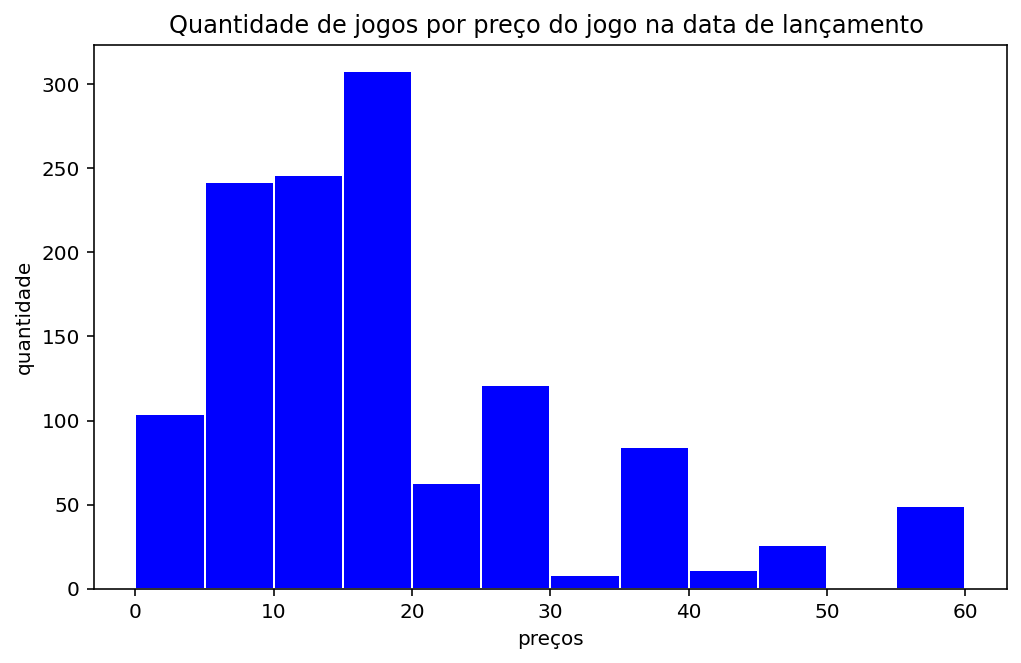

In [5]:
preco_inicial=jogos_Train.OriginalCost

faixas = np.arange(0,65,5)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(preco_inicial, bins=faixas,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('preços')
plt.title('Quantidade de jogos por preço do jogo na data de lançamento ')

**Quantidade por classificação se é indie ou não**

Text(0.5, 1.0, 'Quantidade de jogos por classificação se é indie ou não')

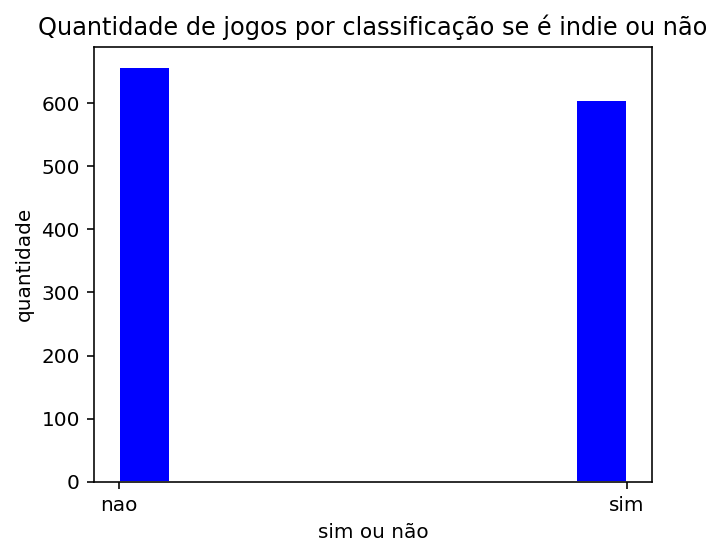

In [6]:
jogos_indie =jogos_Train.Indie

plt.figure(figsize=(5, 4))

plt.hist(jogos_indie,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('sim ou não')
plt.title('Quantidade de jogos por classificação se é indie ou não')

**Quantidade por número de vezes mencionado em redes sociais (presença/relevância)**

Text(0.5, 1.0, 'Quantidade de jogos por número de vezes mencionados em redes sociais')

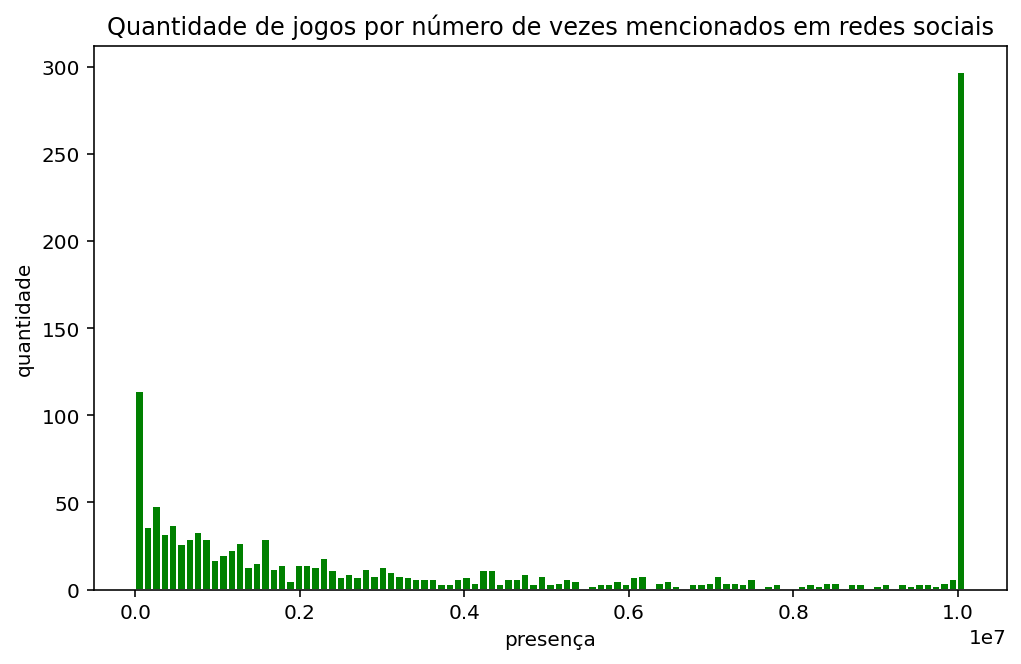

In [7]:
Presence_inicial=jogos_Train.Presence

faixas_Presence = np.linspace(Presence_inicial.min(),Presence_inicial.max(),100)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(Presence_inicial, bins=faixas_Presence, color='green', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('presença')
plt.title('Quantidade de jogos por número de vezes mencionados em redes sociais')

**Quantidade por nota do Metacritic**

Text(0.5, 1.0, 'Quantidade de jogos por nota do Metacritic')

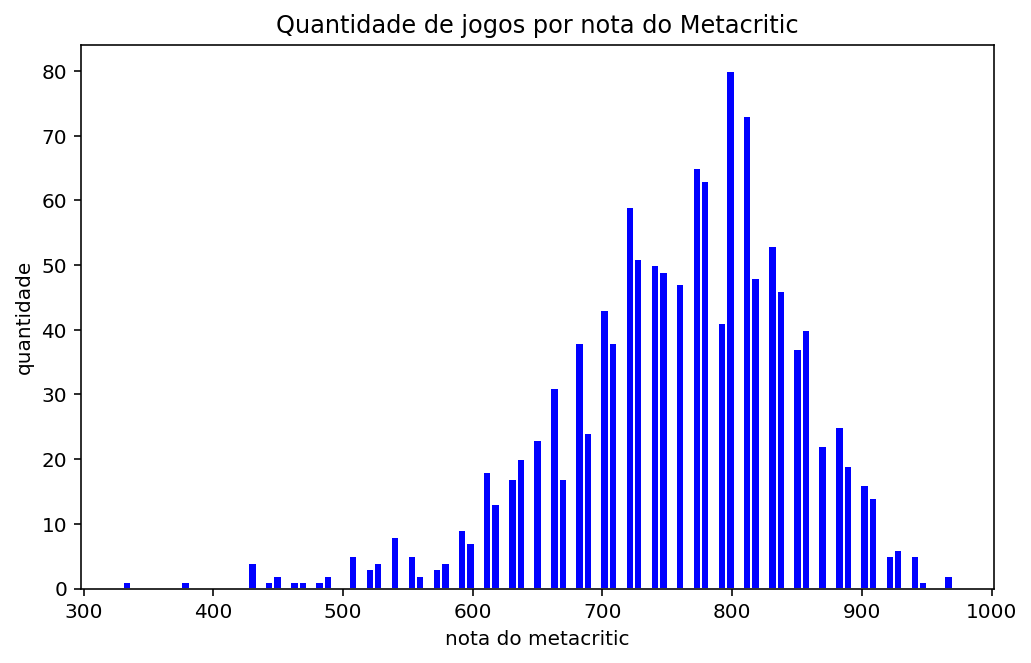

In [8]:
metacritic_inicial=jogos_Train.Metacritic

faixas_metacritic = np.linspace(metacritic_inicial.min(),metacritic_inicial.max(),100)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(metacritic_inicial, bins=faixas_metacritic,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('nota do metacritic')
plt.title('Quantidade de jogos por nota do Metacritic')

**Nota do Metacritic por preço na data de lançamento**

Text(0, 0.5, 'nota do metacritic')

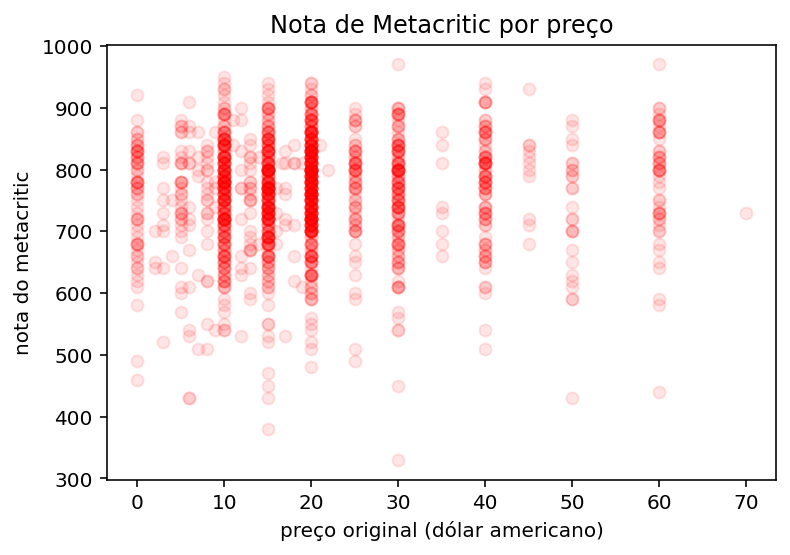

In [9]:
plt.scatter(jogos_Train.OriginalCost,jogos_Train.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por preço')
plt.xlabel('preço original (dólar americano)')
plt.ylabel('nota do metacritic')

In [10]:
jogos_Train.head()

,Name,Metacritic,Genres,Indie,Presence,Platform,OriginalCost,Players,Languages,Achievements
0,Counter-Strike: Global Offensive,830,"Action, Free to Play",nao,10095880,"PC, Xbox 360, PlayStation 3",0.00,"multiplayer, pvp, coop, online coop","English, Czech, Danish, Dutch, Finnish, French...",1790
1,Destiny 2,820,"Action, Adventure, Free to Play",nao,10074250,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",0.00,"multiplayer, coop, online coop","English, French, Italian, German, Japanese, Ko...",610
2,The Elder Scrolls Online,710,"Massively Multiplayer, RPG",nao,10007810,PC,19.99,"singleplayer, multiplayer, coop","English, French, German, Russian",0
3,Sea of Thieves,680,"Action, Adventure",nao,7774560,"PC, Xbox One",39.99,"multiplayer, pvp, coop, online coop","English, French, Italian, German, Russian",3080
4,Tom Clancy's Rainbow Six Siege,750,Action,nao,10014240,"PlayStation 4, PC, Xbox One",19.99,"singleplayer, multiplayer, coop, online coop","English, French, Italian, German, Czech, Dutch...",820


In [11]:
filtrom=jogos_Train.Players.str.contains("multiplayer")
filtropv=jogos_Train.Players.str.contains("pvp")
filtroco=jogos_Train.Players.str.contains("coop")
filtroc=jogos_Train.Players.str.contains("online coop")
filtrosi=jogos_Train.Players.str.contains("singleplayer")

jogos_Train.loc[filtrom,"Multiplayer"]=filtrom
jogos_Train.loc[filtropv,"PVP"]=filtropv
jogos_Train.loc[filtroco,"Coop"]=filtroco
jogos_Train.loc[filtroc,"Online Coop"]=filtroc
jogos_Train.loc[filtrosi,"Singleplayer"]=filtrosi



In [12]:
jogos_Train.head(5)

,Name,Metacritic,Genres,Indie,Presence,Platform,OriginalCost,Players,Languages,Achievements,Multiplayer,PVP,Coop,Online Coop,Singleplayer
0,Counter-Strike: Global Offensive,830,"Action, Free to Play",nao,10095880,"PC, Xbox 360, PlayStation 3",0.00,"multiplayer, pvp, coop, online coop","English, Czech, Danish, Dutch, Finnish, French...",1790,True,True,True,True,NaN
1,Destiny 2,820,"Action, Adventure, Free to Play",nao,10074250,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",0.00,"multiplayer, coop, online coop","English, French, Italian, German, Japanese, Ko...",610,True,NaN,True,True,NaN
2,The Elder Scrolls Online,710,"Massively Multiplayer, RPG",nao,10007810,PC,19.99,"singleplayer, multiplayer, coop","English, French, German, Russian",0,True,NaN,True,NaN,True
3,Sea of Thieves,680,"Action, Adventure",nao,7774560,"PC, Xbox One",39.99,"multiplayer, pvp, coop, online coop","English, French, Italian, German, Russian",3080,True,True,True,True,NaN
4,Tom Clancy's Rainbow Six Siege,750,Action,nao,10014240,"PlayStation 4, PC, Xbox One",19.99,"singleplayer, multiplayer, coop, online coop","English, French, Italian, German, Czech, Dutch...",820,True,NaN,True,True,True


In [13]:
lista=[]

for eli in jogos_Train.Languages:

    a=len(eli.split(","))
    lista.append(a)
jogos_Train.insert(15,"quant_l",lista)


In [14]:
del jogos_Train["Languages"]

In [15]:
textog=",".join(jogos_Train.Genres)
textog=textog.split(",")
lista_gen=[]
for el in textog:
    if el not in lista_gen and el[0]!=" ":
        lista_gen.append(el)
print(lista_gen)




['Action', 'Massively Multiplayer', 'Strategy', 'Racing', 'RPG', 'Simulation', 'Casual', 'Adventure', 'Indie', 'Sports', 'Free to Play']


In [16]:
textplat=",".join(jogos_Train.Platform)
textplat=textplat.split(",")
lista_plat=[]
for el in textplat:
    if el not in lista_plat and el[0]!=" ":
        lista_plat.append(el)
print(lista_plat)

['PC', 'PlayStation 5', 'PlayStation 4', 'Linux', 'Xbox One', 'macOS', 'Android', 'iOS', 'Nintendo Switch', 'PlayStation 3', 'Xbox 360', 'Nintendo 3DS', 'GameCube', 'SNES', 'PS Vita', 'Nintendo DS', 'PlayStation 2', 'Xbox', 'Wii', 'PlayStation', 'Dreamcast']


In [17]:

for elem in lista_gen:
    filtrod=jogos_Train.Genres.str.contains(f"{elem}")
    jogos_Train.loc[filtrod,f"{elem}"]=filtrod



ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [18]:
for ele in lista_plat:
    filtrodd=jogos_Train.Platform.str.contains(f"{ele}")
    jogos_Train.loc[filtrodd,f"{ele}"]=filtrodd

In [19]:
del jogos_Train["Players"]
del jogos_Train["Genres"]
del jogos_Train["Platform"]

In [20]:
jogos_Train= jogos_Train.replace(np.nan, False, regex=True)
jogos_Train.head(5)

,Name,Metacritic,Indie,Presence,OriginalCost,Achievements,Multiplayer,PVP,Coop,Online Coop,...,Nintendo 3DS,GameCube,SNES,PS Vita,Nintendo DS,PlayStation 2,Xbox,Wii,PlayStation,Dreamcast
0,Counter-Strike: Global Offensive,830,nao,10095880,0.00,1790,True,True,True,True,...,False,False,False,False,False,False,True,False,True,False
1,Destiny 2,820,nao,10074250,0.00,610,True,False,True,True,...,False,False,False,False,False,False,True,False,True,False
2,The Elder Scrolls Online,710,nao,10007810,19.99,0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Sea of Thieves,680,nao,7774560,39.99,3080,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
4,Tom Clancy's Rainbow Six Siege,750,nao,10014240,19.99,820,True,False,True,True,...,False,False,False,False,False,False,True,False,True,False


In [21]:
jogos_Train.head(5)

,Name,Metacritic,Indie,Presence,OriginalCost,Achievements,Multiplayer,PVP,Coop,Online Coop,...,Nintendo 3DS,GameCube,SNES,PS Vita,Nintendo DS,PlayStation 2,Xbox,Wii,PlayStation,Dreamcast
0,Counter-Strike: Global Offensive,830,nao,10095880,0.00,1790,True,True,True,True,...,False,False,False,False,False,False,True,False,True,False
1,Destiny 2,820,nao,10074250,0.00,610,True,False,True,True,...,False,False,False,False,False,False,True,False,True,False
2,The Elder Scrolls Online,710,nao,10007810,19.99,0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Sea of Thieves,680,nao,7774560,39.99,3080,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
4,Tom Clancy's Rainbow Six Siege,750,nao,10014240,19.99,820,True,False,True,True,...,False,False,False,False,False,False,True,False,True,False


<BarContainer object of 1263 artists>

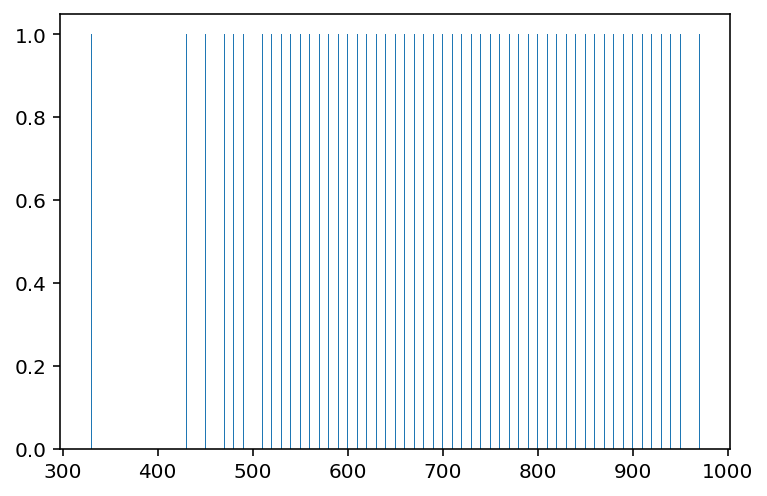

In [35]:
plt.bar(jogos_Train['Metacritic'],jogos_Train['Action'])